In [1]:
import  matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import math

In [51]:
def calculate_pay_off_eur(option_type , strike ,  excercise_price,trade_type,option_price):
    if option_type =='c':
        payoff= max(excercise_price-strike-option_price, -option_price)
    if option_type.lower() =='p':
        payoff= max(strike-excercise_price-option_price, -option_price)
    
    if trade_type =='s':
        payoff=-payoff
    return payoff

In [52]:
def binomial_tree_price_eur(S0,K,T,r, u , d, steps):
    size = steps +1
    dt = T / steps  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probabilities (probs)
    put_tree=np.zeros([size, size])
    ud_tree=np.zeros([size, size])
    call_tree = np.zeros([size, size])
    print(dt , r ,p)
    for i in range(size):
        for j in range(size-i):
            underlying_price = S0*u**j * d**i
            ud_tree[i][j]=underlying_price
            if i+j==steps:
                call_tree[i][j] = max(underlying_price-K,0)
                put_tree[i][j] = max(K-underlying_price,0)
                
    for i in range(steps-1, -1,-1):
        for j in range(steps-1,-1,-1):
            if i+j!=steps:
                call_tree[j][i] = np.exp(-r * dt) * (p * call_tree[j , i + 1] + (1 - p) * call_tree[j + 1, i])
                put_tree[j][i] = np.exp(-r * dt) * (p * put_tree[j , i + 1] + (1 - p) * put_tree[j + 1, i])

    return ud_tree, call_tree,put_tree

In [59]:
def binomial_tree_eur_m(S0,K,T,r, u , d, steps):
    size = steps +1
    dt = T / steps  # Define time step
    p = (np.exp(r * dt) - d) / (u - d)  # Risk neutral probabilities (probs)
    put_tree=np.zeros([size, size])
    ud_tree=np.zeros([size, size])
    call_tree = np.zeros([size, size])
    print(dt , r ,p)
    for i in range(size):
        for j in range(size-i):
            underlying_price = S0*u**j * d**i
            ud_tree[i][j]=underlying_price
            if i+j==steps:
                call_tree[i][j] = max(underlying_price-K,0)
                put_tree[i][j] = max(K-underlying_price,0)
                
#     for i in range(steps-1, -1,-1):
#         for j in range(steps-1,-1,-1):
#             if i+j!=steps:
#                 call_tree[j][i] = np.exp(-r * dt) * (p * call_tree[j , i + 1] + (1 - p) * call_tree[j + 1, i])
#                 put_tree[j][i] = np.exp(-r * dt) * (p * put_tree[j , i + 1] + (1 - p) * put_tree[j + 1, i])
    return ud_tree, call_tree,put_tree

In [61]:
binomial_tree_eur(145, 100, 100, 0.1, 1.2, 0.8, 2)

50.0 0.1 369.03289775644157


(array([[145. , 174. , 208.8],
        [116. , 139.2,   0. ],
        [ 92.8,   0. ,   0. ]]),
 array([[189.27070365, 173.3262053 , 108.8       ],
        [ 97.47174496,  39.2       ,   0.        ],
        [  0.        ,   0.        ,   0.        ]]),
 array([[ 44.27524364,   0.        ,   0.        ],
        [-17.85446034,   0.        ,   0.        ],
        [  7.2       ,   0.        ,   0.        ]]))

In [25]:
def binomial_tree_price_eur(S0,K,T,r, u , d, steps):
    ud_tree, call_tree,put_tree = binomial_tree_eur(S0,K,T,r, u , d, steps)
    stock_price = ud_tree[0][0]
    call_price= call_tree[0][0]
    put_price = put_tree[0][0]
    return stock_price, call_price,put_price

In [26]:
S0 = 100
r = .05 
sigma = .2
T = 3
K=90
steps = 3
d= np.exp(-sigma*np.sqrt(T/steps))
u = 1/d

For put call parity to hold following equation should be satisfied :

C: call price 

K:  strike 

S: underlying price

P:  put price 

r: risk-free interest rate

t:  time to expiry

$$ C+K*(e^-rt) = P+S  $$


In [27]:
S0

100

In [28]:
S, C , P = binomial_tree_price_eur(S0,K,T,r, u , d, steps)

1.0 0.05 0.5774931963561243


In [29]:
binomial_tree_eur(S0,K,T,r, u , d, steps)

1.0 0.05 0.5774931963561243


(array([[100.        , 122.14027582, 149.18246976, 182.21188004],
        [ 81.87307531, 100.        , 122.14027582,   0.        ],
        [ 67.0320046 ,  81.87307531,   0.        ,   0.        ],
        [ 54.88116361,   0.        ,   0.        ,   0.        ]]),
 array([[26.97938803, 42.01760431, 63.57182156, 92.21188004],
        [ 9.69870825, 17.65557017, 32.14027582,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 array([[ 4.44310591,  1.31269612,  0.        ,  0.        ],
        [ 9.26100056,  3.26621838,  0.        ,  0.        ],
        [18.5786436 ,  8.12692469,  0.        ,  0.        ],
        [35.11883639,  0.        ,  0.        ,  0.        ]]))

In [20]:
K_present = K*np.exp(-r*T)

In [30]:
S, C , P

(100.0, 26.979388033508236, 4.443105911763413)

In [31]:
S+P-K_present

26.9793880335082

In [38]:
sigma = 0.25
T=1/2
N=3
dt = T/N

In [39]:
u = np.exp(sigma * np.sqrt(dt))  # Define u
d = np.exp(-sigma * np.sqrt(dt))

In [40]:
binomial_tree_price_eur(180, 182, 1/2, 0.02,u,d , 3)

0.16666666666666666 0.02 0.49083542271712927


(180.0, 13.633315352711051, 13.82238509505968)

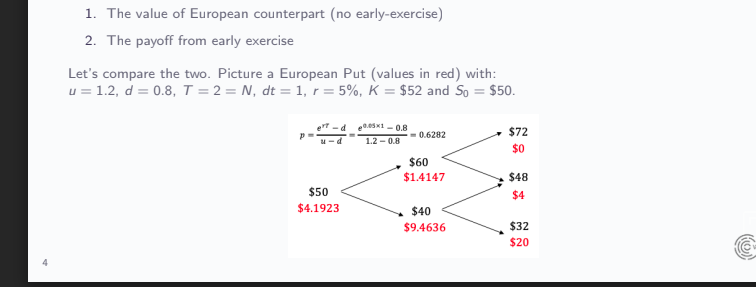

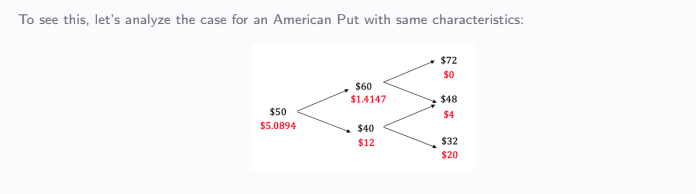

In [ ]:
u = 1.2, d = 0.8, T = 2 = N, dt = 1, r = 5%, K = $52 and S0 = $50.

In [76]:
binomial_tree_option(50, 52, 2, 0.05, 1.2, .8, 2)

1.0 0.05 0.6281777409400603


(array([[50., 60., 72.],
        [40., 48.,  0.],
        [32.,  0.,  0.]]),
 array([[ 7.14110854, 11.95082302, 20.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 array([[ 4.19265428,  1.41475309,  0.        ],
        [ 9.46393007,  4.        ,  0.        ],
        [20.        ,  0.        ,  0.        ]]),
 array([[ 7.14110854, 11.95082302, 20.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 array([[ 5.08963247,  1.41475309,  0.        ],
        [12.        ,  4.        ,  0.        ],
        [20.        ,  0.        ,  0.        ]]))

In [71]:
import numpy as np

def binomial_tree_option(S0, K, T, r, u, d, steps):
    size = steps + 1
    dt = T / steps
    p = (np.exp(r * dt) - d) / (u - d)
    ud_tree = np.zeros([size, size])
    eu_put_tree = np.zeros([size, size])
    eu_call_tree = np.zeros([size, size])
    am_put_tree = np.zeros([size, size])
    am_call_tree = np.zeros([size, size])

    print(dt, r, p)
    for i in range(size):
        for j in range(size - i):
            underlying_price = S0 * u ** j * d ** i
            ud_tree[i][j] = underlying_price
            if i + j == steps:
                eu_call_tree[i][j] = max(underlying_price - K, 0)
                eu_put_tree[i][j] = max(K - underlying_price, 0)
                am_call_tree[i][j] = max(underlying_price - K, 0)
                am_put_tree[i][j] = max(K - underlying_price, 0)


    for i in range(steps - 1, -1, -1):
        for j in range(steps - 1, -1, -1):
            if i + j != steps:
                eu_call_tree[j][i] = np.exp(-r * dt) * (p * eu_call_tree[j, i + 1] + (1 - p) * eu_call_tree[j + 1, i])
                eu_put_tree[j][i] = np.exp(-r * dt) * (p * eu_put_tree[j, i + 1] + (1 - p) * eu_put_tree[j + 1, i])

                am_call_tree[j][i] = max((ud_tree[j][i] - K), eu_call_tree[j][i] )
                am_put_tree[j][i] = max((K-ud_tree[j][i] ), eu_put_tree[j][i] )

    return ud_tree, eu_call_tree, eu_put_tree,am_call_tree,am_put_tree

binomial_tree_option(145, 100, 100, 0.1, 1.2, 0.8, 2)

50.0 0.1 369.03289775644157


(array([[145. , 174. , 208.8],
        [116. , 139.2,   0. ],
        [ 92.8,   0. ,   0. ]]),
 array([[189.27070365, 173.3262053 , 108.8       ],
        [ 97.47174496,  39.2       ,   0.        ],
        [  0.        ,   0.        ,   0.        ]]),
 array([[ 44.27524364,   0.        ,   0.        ],
        [-17.85446034,   0.        ,   0.        ],
        [  7.2       ,   0.        ,   0.        ]]),
 array([[189.27070365, 173.3262053 , 108.8       ],
        [ 97.47174496,  39.2       ,   0.        ],
        [  0.        ,   0.        ,   0.        ]]),
 array([[ 44.27524364,   0.        ,   0.        ],
        [-16.        ,   0.        ,   0.        ],
        [  7.2       ,   0.        ,   0.        ]]))

In [75]:
import numpy as np

def binomial_tree_option(S0, K, T, r, u, d, steps):
    size = steps + 1
    dt = T / steps
    p = (np.exp(r * dt) - d) / (u - d)
    ud_tree = np.zeros([size, size])
    eu_put_tree = np.zeros([size, size])
    eu_call_tree = np.zeros([size, size])
    am_put_tree = np.zeros([size, size])
    am_call_tree = np.zeros([size, size])

    print(dt, r, p)
    for i in range(size):
        for j in range(size - i):
            underlying_price = S0 * u ** j * d ** i
            ud_tree[i][j] = underlying_price
            if i + j == steps:
                eu_call_tree[i][j] = max(underlying_price - K, 0)
                eu_put_tree[i][j] = max(K - underlying_price, 0)
                am_call_tree[i][j] = max(underlying_price - K, 0)
                am_put_tree[i][j] = max(K - underlying_price, 0)


    for i in range(steps - 1, -1, -1):
        for j in range(steps - 1, -1, -1):
            if i + j != steps:
                
                eu_call_tree[j][i] = np.exp(-r * dt) * (p * eu_call_tree[j, i + 1] + (1 - p) * eu_call_tree[j + 1, i])
                eu_put_tree[j][i] = np.exp(-r * dt) * (p * eu_put_tree[j, i + 1] + (1 - p) * eu_put_tree[j + 1, i])
                
                am_call_tree[j][i] = np.exp(-r * dt) * (p * am_call_tree[j, i + 1] + (1 - p) * am_call_tree[j + 1, i])
                am_put_tree[j][i] = np.exp(-r * dt) * (p * am_put_tree[j, i + 1] + (1 - p) * am_put_tree[j + 1, i])

                am_call_tree[j][i] = max((ud_tree[j][i] - K), am_call_tree[j][i] )
                am_put_tree[j][i] = max((K-ud_tree[j][i] ), am_put_tree[j][i] )

    return ud_tree, eu_call_tree, eu_put_tree,am_call_tree,am_put_tree

binomial_tree_option(145, 100, 100, 0.1, 1.2, 0.8, 2)

50.0 0.1 369.03289775644157


(array([[145. , 174. , 208.8],
        [116. , 139.2,   0. ],
        [ 92.8,   0. ,   0. ]]),
 array([[189.27070365, 173.3262053 , 108.8       ],
        [ 97.47174496,  39.2       ,   0.        ],
        [  0.        ,   0.        ,   0.        ]]),
 array([[ 44.27524364,   0.        ,   0.        ],
        [-17.85446034,   0.        ,   0.        ],
        [  7.2       ,   0.        ,   0.        ]]),
 array([[189.27070365, 173.3262053 , 108.8       ],
        [ 97.47174496,  39.2       ,   0.        ],
        [  0.        ,   0.        ,   0.        ]]),
 array([[ 39.67657854,   0.        ,   0.        ],
        [-16.        ,   0.        ,   0.        ],
        [  7.2       ,   0.        ,   0.        ]]))

In [67]:
binomial_tree_option(100, 90, 10, 0, 0.3, 10)

TypeError: binomial_tree_option() missing 1 required positional argument: 'steps'